### Problem statement
To build a classification model that predicts whether a patient has heart disease (1) or not (0) based on the provided features.

## Features
- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

## Data collection
Dataset source - (https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data)

## 1. Importing Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings
pd.options.display.max_rows = 999
warnings.filterwarnings('ignore')


Importing data csv as Pandas DataFrame

In [2]:
df = pd.read_csv('data/heart.csv')

## 2. Data insight

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.shape

(918, 12)

Data doesnt have any Nan values.

In [5]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Data doesnt have any duplicates

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [9]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


The features means are very different. This tells us that we need to standarize data.

In [10]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {0} numerical values: {1}'.format(len(numeric_features),numeric_features))
print('We have {0} categorical values: {1}'.format(len(categorical_features),categorical_features))


We have 7 numerical values: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']
We have 5 categorical values: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


## 3. EDA with visualization

<Axes: xlabel='FastingBS', ylabel='Count'>

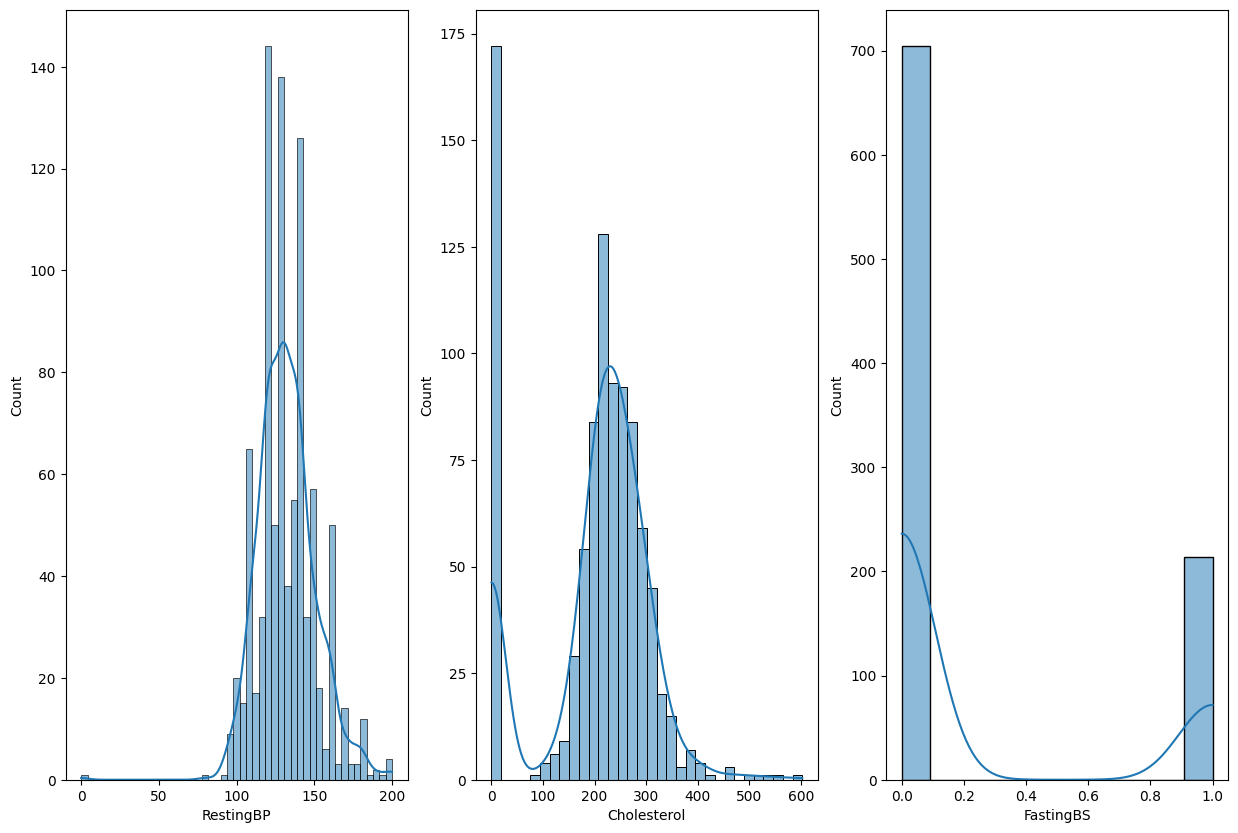

In [11]:
plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
sns.histplot(data=df,x='RestingBP',kde=True)
plt.subplot(1,3,2)
sns.histplot(data=df,x='Cholesterol',kde=True)
plt.subplot(1,3,3)
sns.histplot(data=df,x='FastingBS',kde=True)


Conclusions:
- RestingBP is distributed normally
- Cholesterol is also distributed normally because 0 values are unreal.
- 

We can see that for RestingBP is value 0 and for cholesterol are so much values 0 what is impossible. So we are going to do something with that.

In [12]:
# This record is false information. We are going to replace 0 values with something.
# df[df['RestingBP']==0]

In [13]:
# df.loc[449,['RestingBP','Cholesterol']] = np.nan

In [14]:
# df[df['Cholesterol']==0]['Cholesterol'] = np.nan

<Axes: xlabel='RestingBP'>

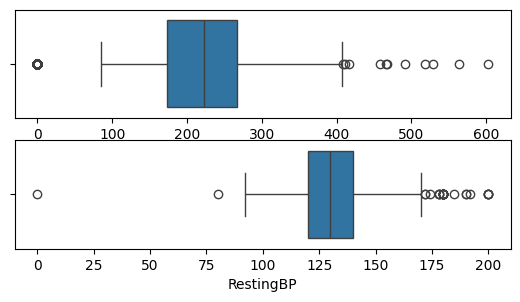

In [15]:
plt.subplot(3,1,1)
sns.boxplot(data=df,x = 'Cholesterol')
plt.subplot(3,1,2)
sns.boxplot(data=df,x = 'RestingBP')

There are many outliers in columns RestingBP and Cholesterol so we are going to replace nan values with median.

In [16]:
# df['Cholesterol'] = df['Cholesterol'].fillna(df['Cholesterol'].median())
# df['RestingBP'] = df['RestingBP'].fillna(df['RestingBP'].median())

In [17]:
# df.isna().sum()

<Axes: xlabel='Oldpeak', ylabel='Count'>

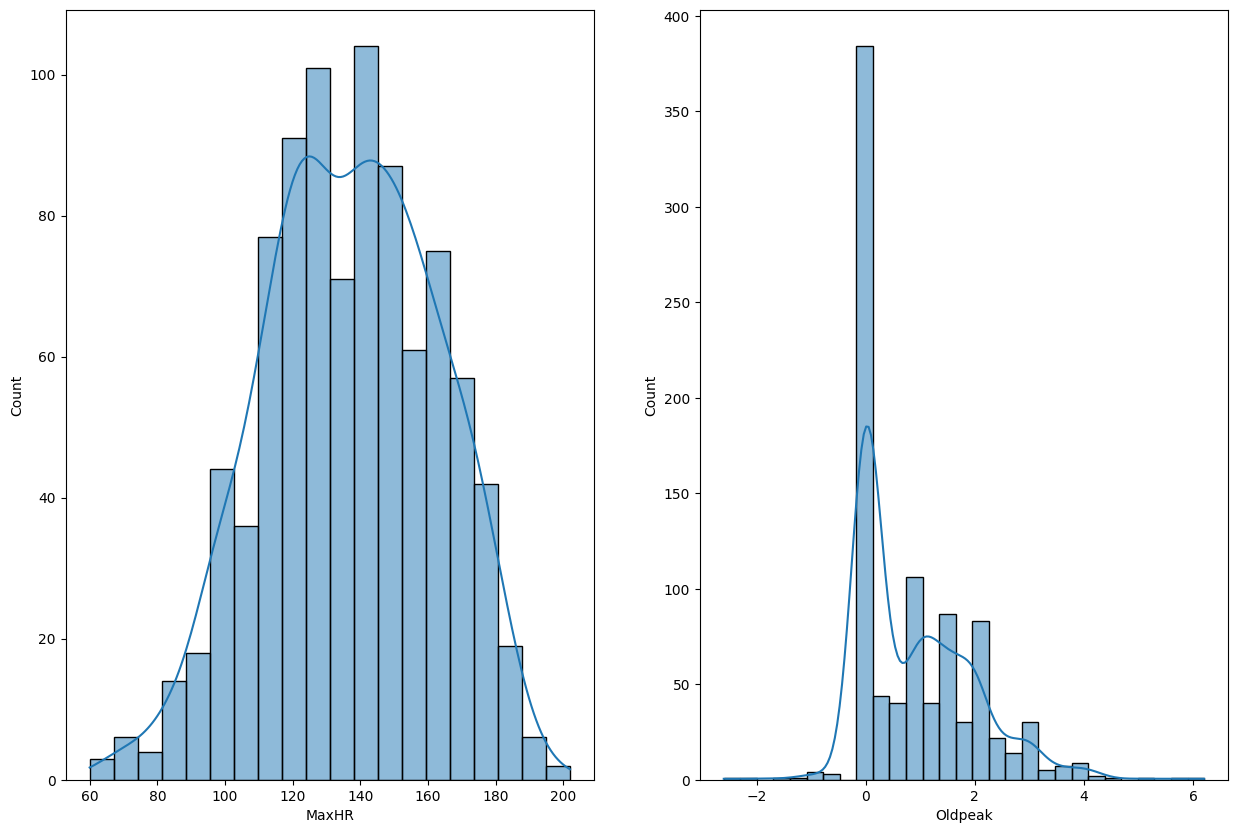

In [18]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.histplot(data=df,x='MaxHR',kde=True)
plt.subplot(1,2,2)
sns.histplot(data=df,x='Oldpeak',kde=True)

- Oldpeak is right-scewed

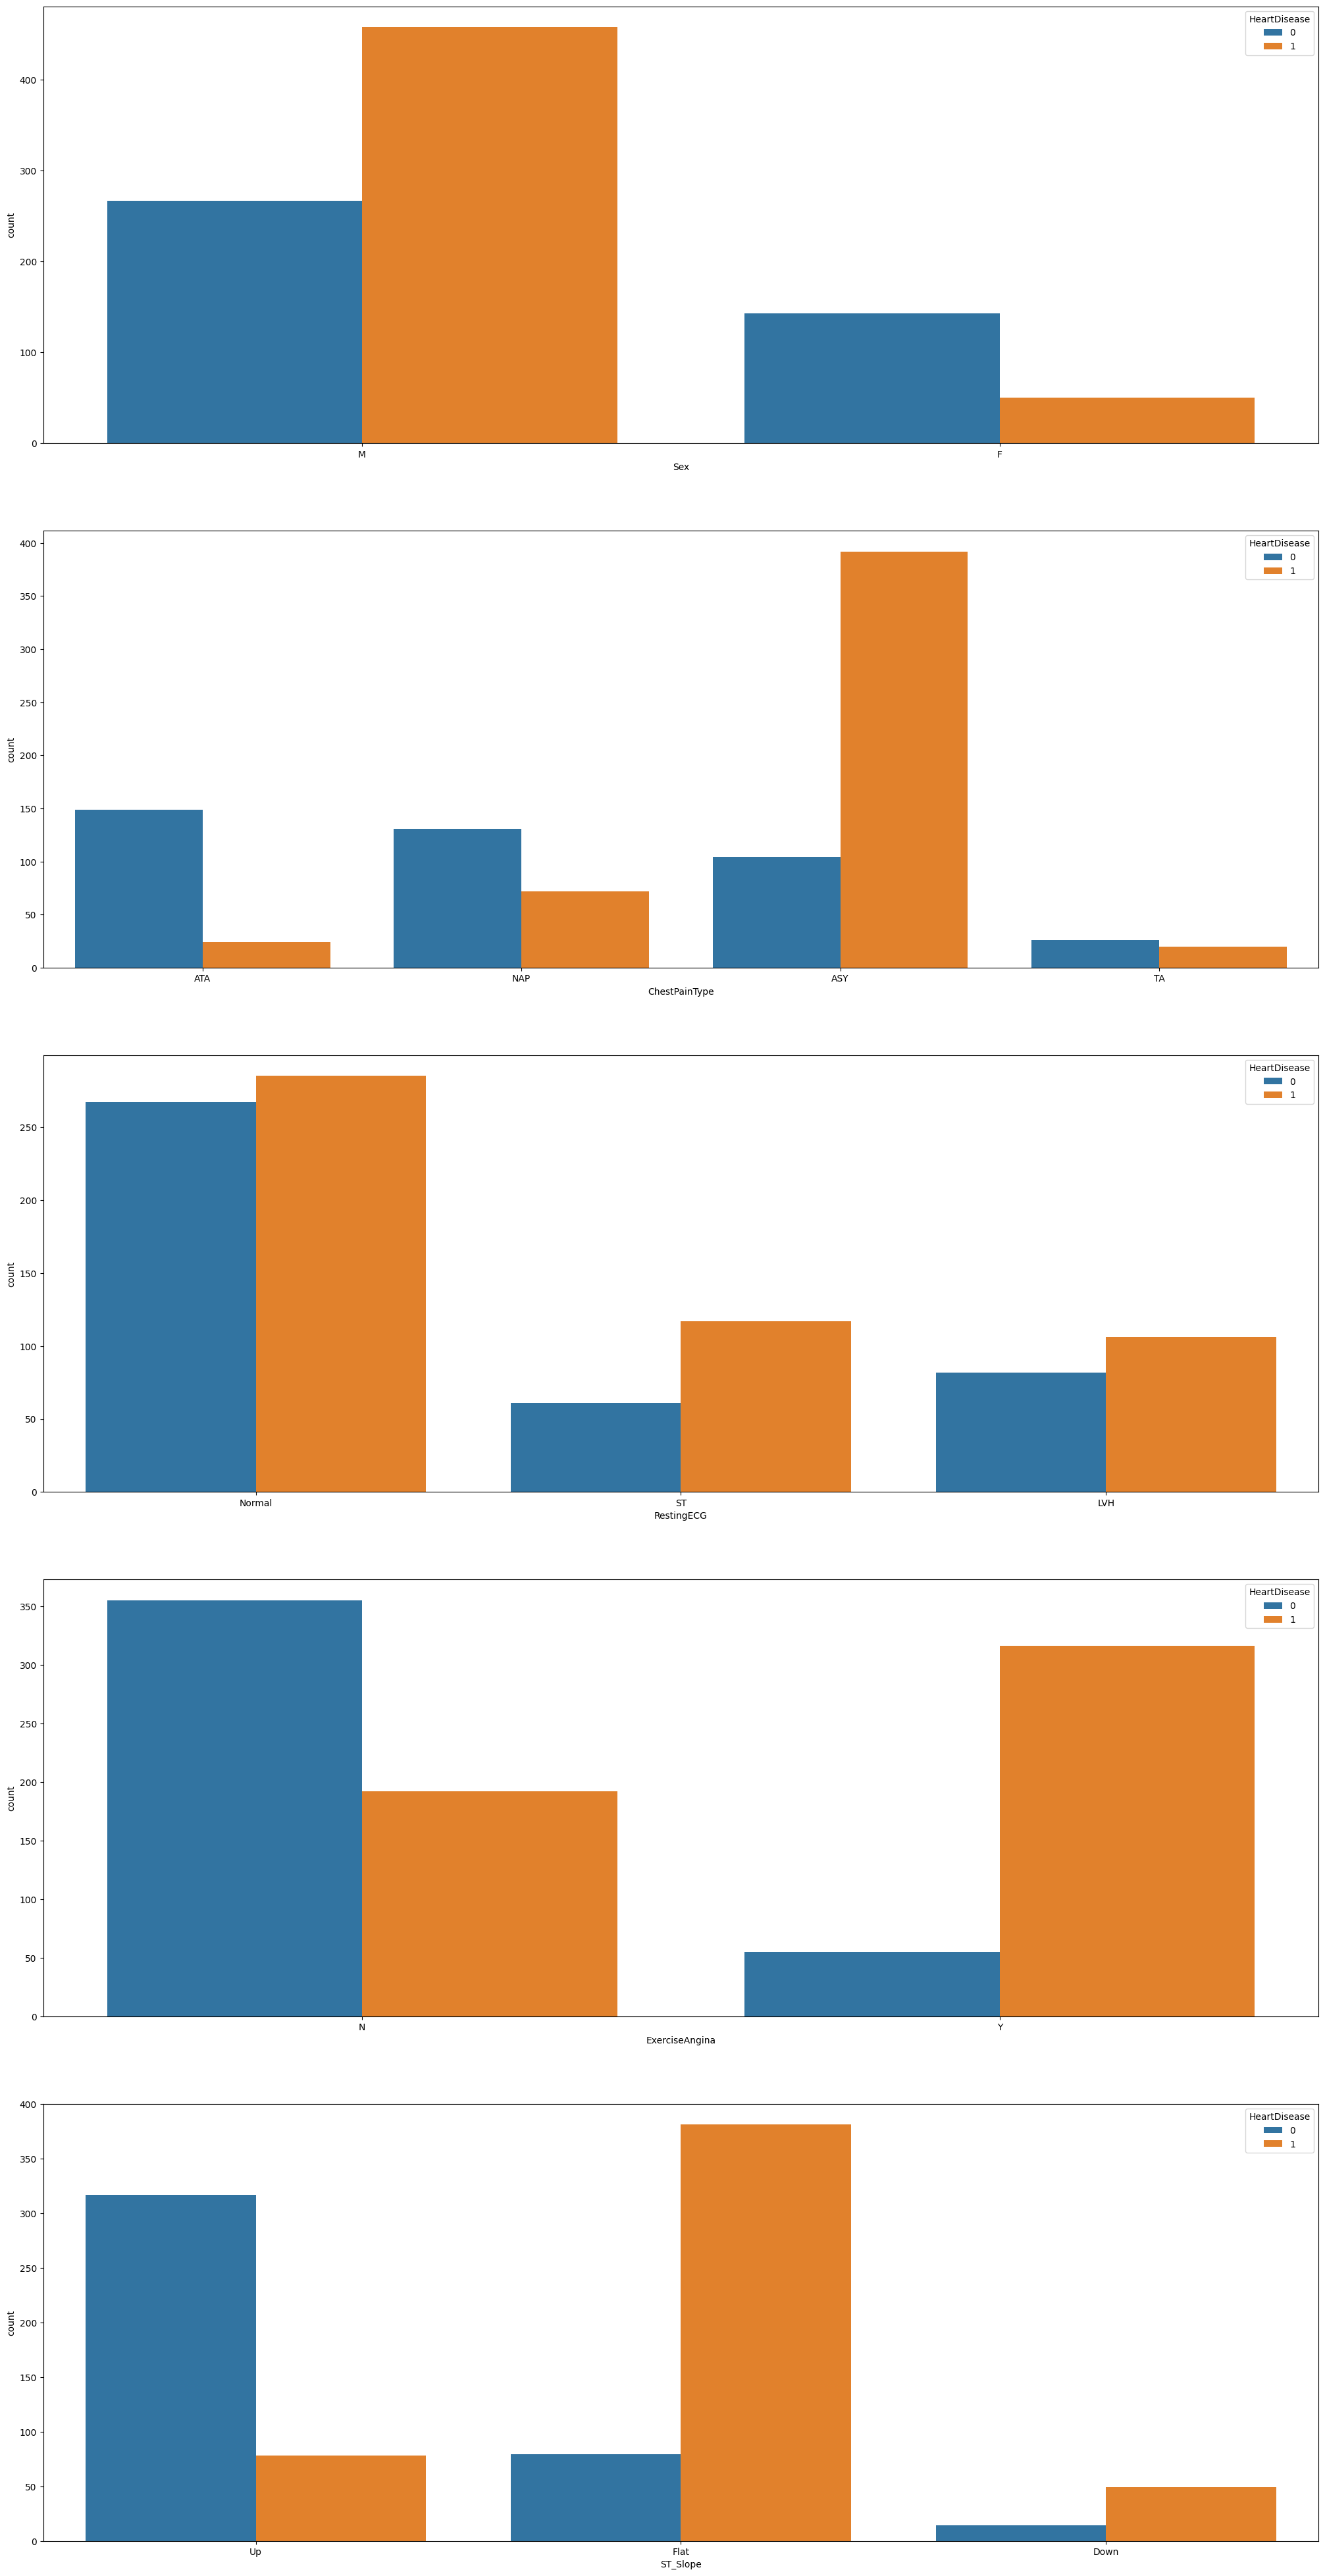

In [19]:
plt.figure(figsize=(25,50))
for i,feature in enumerate(categorical_features):
    plt.subplot(5,1,i+1)
    sns.countplot(data=df,x=feature,hue='HeartDisease')

Conclusions:
- The number of males tested is a lot bigger than females
- Most of the cases have ST slope Flat or Up
- The resting electrocardiogram results were normal for most of the patients.

In [20]:
# df['ExerciseAngina'] = df['ExerciseAngina'].map({'N':0,'Y':1})
# df['Sex'] = df['Sex'].map({'M':1,'F':0})

In [21]:
# from sklearn.preprocessing import TargetEncoder
# te = TargetEncoder()
# df['ST_Slope'] = te.fit_transform(df[['ST_Slope']],df['HeartDisease'])
# df['ChestPainType'] = te.fit_transform(df[['ChestPainType']],df['HeartDisease'])

In [22]:
# freq = df["RestingECG"].value_counts(normalize=True)
# df["RestingECG"] = df["RestingECG"].map(freq)

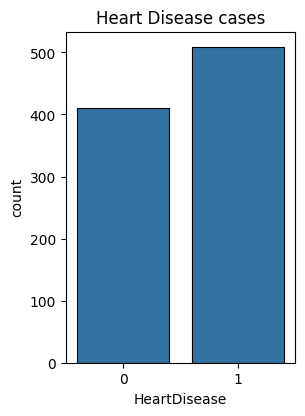

In [23]:

plt.subplot(1, 2, 2)
ax = sns.countplot(df, x="HeartDisease", edgecolor="black", linewidth=0.8)


plt.title("Heart Disease cases")

plt.tight_layout(pad=3)

There are slightly more cases with heart disease than no heart disease cases. Dataset is balanced 